In [157]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
import numpy as np

In [158]:
df=pd.read_csv('ds_salaries.csv')

In [159]:
df.drop(columns=['Unnamed: 0','salary_currency','salary'],inplace=True)

In [160]:
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,US,100,US,M


In [161]:
categorical_cols = ['work_year', 'job_title', 'experience_level', 'employment_type', 'employee_residence','company_location',
                   'company_size'] 

# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col)) 
ohe = OneHotEncoder()

#One-hot-encode the categorical columns.
#Unfortunately outputs an array instead of dataframe.
array_hot_encoded = ohe.fit_transform(df[categorical_cols])

#Convert it to df
data_hot_encoded = pd.DataFrame(array_hot_encoded, index=df.index)

#Extract only the columns that didnt need to be encoded
data_other_cols = df.drop(columns=categorical_cols)

#Concatenate the two dataframes : 
data_out = pd.concat([data_hot_encoded, data_other_cols], axis=1)

In [162]:
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2,2,22,79833,14,0,12,0
1,0,3,2,41,260000,32,0,29,2
2,0,3,2,7,109024,20,50,18,1
3,0,2,2,47,20000,23,0,20,2
4,0,3,2,38,150000,55,50,48,0
...,...,...,...,...,...,...,...,...,...
602,2,3,2,17,154000,55,100,48,1
603,2,3,2,17,126000,55,100,48,1
604,2,3,2,12,129000,55,0,48,1
605,2,3,2,12,150000,55,100,48,1


In [163]:
df.corr()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
work_year,1.000000,0.300632,0.016323,-0.162560,0.170493,0.193552,0.076314,0.181515,0.078764
experience_level,0.300632,1.000000,-0.043715,0.020192,0.315312,0.226543,0.053628,0.247133,-0.066423
employment_type,0.016323,-0.043715,1.000000,-0.101823,-0.123545,-0.109979,-0.045592,-0.083661,0.034549
job_title,-0.162560,0.020192,-0.101823,1.000000,0.131016,-0.119135,-0.058589,-0.147379,-0.031011
salary_in_usd,0.170493,0.315312,-0.123545,0.131016,1.000000,0.452501,0.132122,0.428994,-0.151205
employee_residence,0.193552,0.226543,-0.109979,-0.119135,0.452501,1.000000,0.157299,0.897704,-0.081742
remote_ratio,0.076314,0.053628,-0.045592,-0.058589,0.132122,0.157299,1.000000,0.169083,0.022070
company_location,0.181515,0.247133,-0.083661,-0.147379,0.428994,0.897704,0.169083,1.000000,-0.066554
company_size,0.078764,-0.066423,0.034549,-0.031011,-0.151205,-0.081742,0.022070,-0.066554,1.000000


<AxesSubplot:>

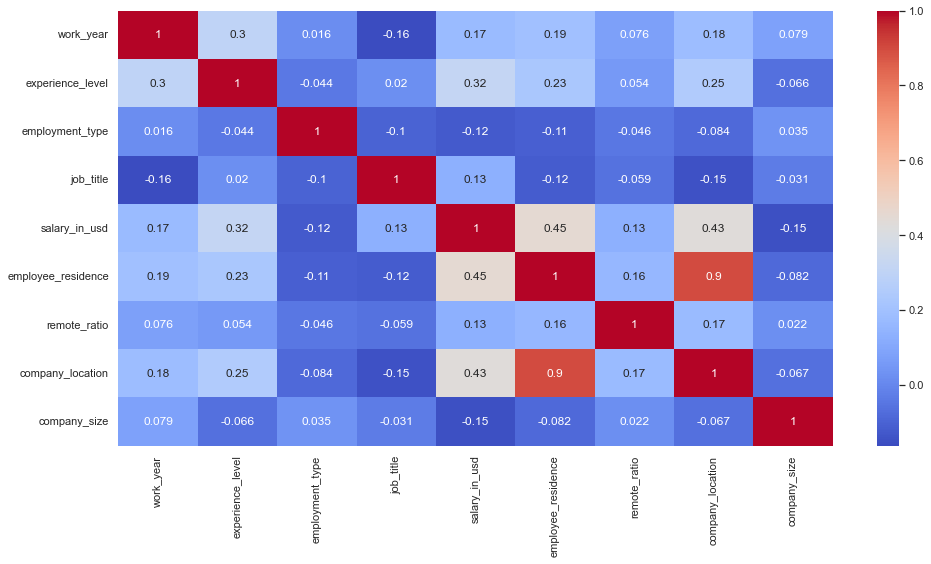

In [164]:
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

Actually,In this dataset there is no such columns that their correlation is above 0.95, so I think we should keep all these columns in order to get accurate result.

Before PCA, we should standardize our dataset.

In [165]:
X_train, X_test, y_train, y_test = X_train, X_test, y_train, y_test = train_test_split(df[df.columns[df.columns != 'salary_in_usd']],
                   df['salary_in_usd'], test_size=0.3, random_state=1)

In [166]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [167]:

pca = PCA()
#
# Determine transformed features
#
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

So we should find for n's which value our model will be much more accurate, for that reason I have used hyperparameter tuning

In [174]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train_pca,y_train)
model.best_params_

{'n_neighbors': 9}

In [187]:
model=KNeighborsRegressor(n_neighbors=9)

In [188]:
model.fit(X_train_pca,y_train)

KNeighborsRegressor(n_neighbors=9)

In [189]:
y_pred=model.predict(X_test_pca)

In [190]:
r2_valid = r2_score(y_test, y_pred)
mae_valid = mean_absolute_error(y_test, y_pred)
evs_valid = explained_variance_score(y_test, y_pred, multioutput='uniform_average')
rmse_valid = np.sqrt(mean_squared_error(y_test, y_pred))
rmsle_valid = np.sqrt(mean_squared_log_error(y_test, y_pred))

print('R2 Valid:',r2_valid)
print('EVS Valid:', evs_valid)
print('MAE Valid:', mae_valid)
print('RMSE Valid:',rmse_valid)
print('RMSLE Valid:', rmsle_valid)

R2 Valid: 0.4082369833838483
EVS Valid: 0.40927795799377953
MAE Valid: 37564.24347298117
RMSE Valid: 49724.55742790205
RMSLE Valid: 0.6158043664739088
